<a href="https://colab.research.google.com/github/Behnam9473/AI/blob/main/CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [2]:
#Load data
cifar10 = tf.keras.datasets.cifar10

(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()
xtrain, xtest = xtrain / 250.0, xtest / 255.0
ytrain, ytest = ytrain.flatten(), ytest.flatten()
print("xtrain shape is = ", xtrain.shape)
print("ytrain shape is = ", ytrain.shape)
print("xtest shape is = ", xtest.shape)
print("ytest shape is = ", ytest.shape)

170498071/170498071 [==============================] - 3s 0us/step
xtrain shape is =  (50000, 32, 32, 3)
ytrain shape is =  (50000,)
xtest shape is =  (10000, 32, 32, 3)
ytest shape is =  (10000,)


In [3]:
# number of classes
K = len(set(ytrain))
print("number of classes are = ", K)

number of classes are =  10


In [4]:
print(xtrain[0].shape)

(32, 32, 3)


In [5]:
# Build the model using the functional API
i = Input(shape = xtrain[0].shape) # = (28,28,1)
x = Conv2D(32,(3, 3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3, 3), strides = 2, activation = 'tanh')(x)
x = Conv2D(128, (3, 3), strides = 2, activation = 'tanh')(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation = 'tanh')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = "softmax")(x)
model = Model(i, x)

In [6]:
from tensorflow.python import metrics
# compile and fit 
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 15)

Epoch 1/15
1563/1563 [==============================] - 68s 42ms/step - loss: 1.5236 - accuracy: 0.4501 - val_loss: 1.2087 - val_accuracy: 0.5693
Epoch 2/15
1563/1563 [==============================] - 42s 27ms/step - loss: 1.2170 - accuracy: 0.5692 - val_loss: 1.0716 - val_accuracy: 0.6198
Epoch 3/15
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0736 - accuracy: 0.6219 - val_loss: 0.9888 - val_accuracy: 0.6508
Epoch 4/15
1563/1563 [==============================] - 43s 28ms/step - loss: 0.9819 - accuracy: 0.6557 - val_loss: 0.9960 - val_accuracy: 0.6574
Epoch 5/15
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9092 - accuracy: 0.6807 - val_loss: 0.9666 - val_accuracy: 0.6671
Epoch 6/15
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8518 - accuracy: 0.7020 - val_loss: 0.9236 - val_accuracy: 0.6853
Epoch 7/15
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8036 - accuracy: 0.7198 - val_loss: 0.8994 -

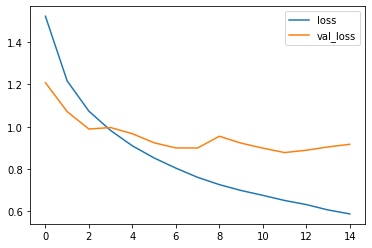

In [7]:
# plot loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

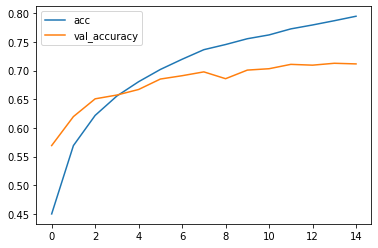

In [8]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

313/313 [==============================] - 3s 8ms/step
Confusion matrix, without normalization
[[738  26  66  19  28   3   7   9  88  16]
 [ 17 841   3  10   4   3  13   4  39  66]
 [ 47   4 639  72  82  40  44  48  17   7]
 [ 22  15  80 572  71  98  61  37  24  20]
 [ 25   1  81  64 693  22  40  62  10   2]
 [ 15   2  64 241  64 486  37  70  14   7]
 [ 13   7  36  71  44  15 795   4  11   4]
 [ 14   1  34  48  53  27   7 793  10  13]
 [ 59  31  16  16   9   3   2   1 846  17]
 [ 41  96  13  26   8   8  13  28  53 714]]


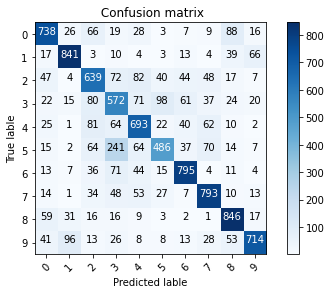

In [9]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plt_CM(cm, classes,
           normalize = False,
           title = ' Confusion matrix',
           cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print('Confusion matrix, with normalization')
  else:
    print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = (np.arange(len(classes)))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j, i, format(cm[i,j], fmt),
              horizontalalignment = 'center',
              color = 'white' if cm[i,j] > thresh else "black")
    plt.tight_layout()  
    plt.ylabel("True lable")
    plt.xlabel("Predicted lable")
    plt.show()

ptest = model.predict(xtest).argmax(axis = 1)
cm = confusion_matrix(ytest, ptest)
plt_CM(cm, list(range(10)))

In [10]:
# lable mapping....
labels = """
airplan
automobile
bird
cat
deer
dog
frog
horse
ship
truck""".split()

Text(0.5, 1.0, 'True label is: cat and predicted one is: dog')

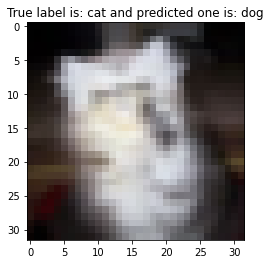

In [21]:
#Some misclassifid examples
misclassified_idx = np.where(ptest != ytest)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(xtest[i],cmap = 'gray')
plt.title('True label is: %s and predicted one is: %s' % (labels[ytest[i]], labels[ptest[i]]))